In [1]:
import pandas as pd
df=pd.read_csv("dbscandata.csv")

In [2]:
df

,438.69535808187067,-51.484098753676655
0,489.914898,30.961826
1,426.663674,-13.561539
2,480.030675,-10.498541
3,469.455506,39.820813
4,510.680056,-18.995774
...,...,...
2294,582.000000,-333.000000
2295,-254.000000,-522.000000
2296,218.000000,473.000000
2297,507.000000,-66.000000


In [3]:
import sqlite3
con=sqlite3.connect("accident_data_v1.0.0_2023.db")

In [4]:
cur=con.cursor()

In [5]:
import pandas as pd
accident = pd.read_sql_query("SELECT * FROM accident  WHERE accident_year=2020;", con)
accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [15]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [6]:
accident["time"].isna().sum()

0

In [6]:
longitude=accident["longitude"]
latitude=accident["latitude"]

In [7]:
longitude.dropna(inplace=True)
latitude.dropna(inplace=True)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

In [19]:
data = np.column_stack((longitude, latitude))

len(data)

91185

In [20]:
final_size = 20000
data = data[np.random.choice(len(data), final_size, replace=False)]

In [21]:
len(data)

20000

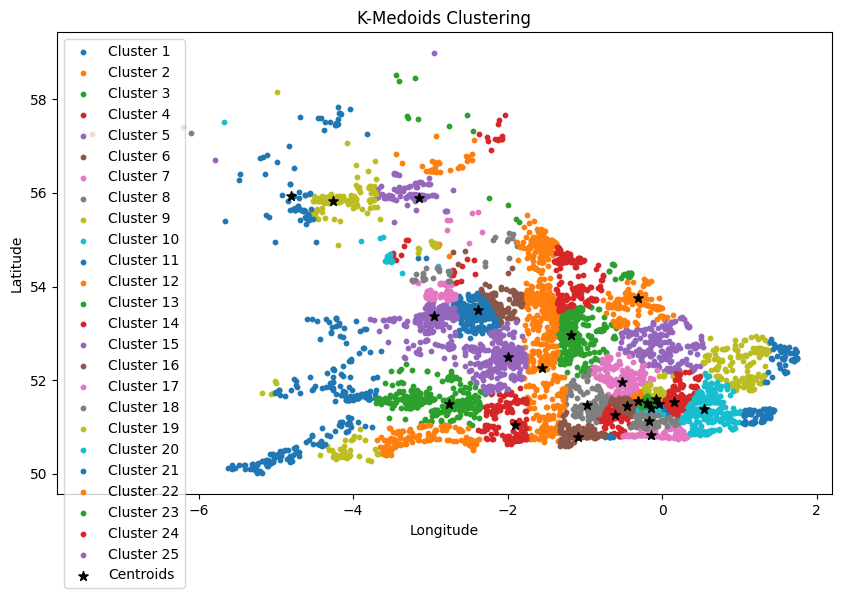

In [15]:

# Perform K-Medoids clustering
num_clusters = 25
kmedoids = KMedoids(n_clusters=num_clusters, metric='haversine')
kmedoids.fit(data)

# Get cluster labels and cluster centers
cluster_labels = kmedoids.labels_
cluster_centers = kmedoids.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = data[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}',s=10)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', color='black', s=50, label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

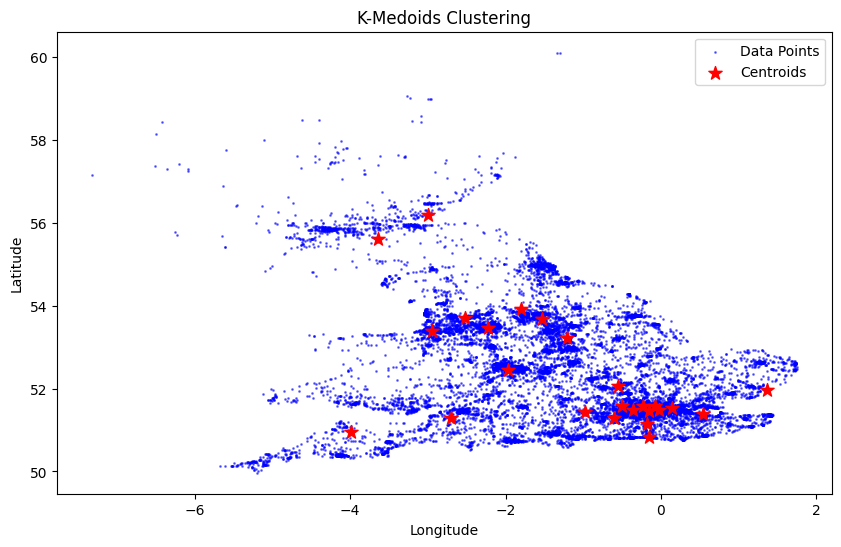

In [31]:
num_clusters = 25
kmedoids = KMedoids(n_clusters=num_clusters, metric='haversine')
kmedoids.fit(data)

# Get cluster centers
cluster_centers = kmedoids.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Data Points',s=1)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', color='red', s=100, label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

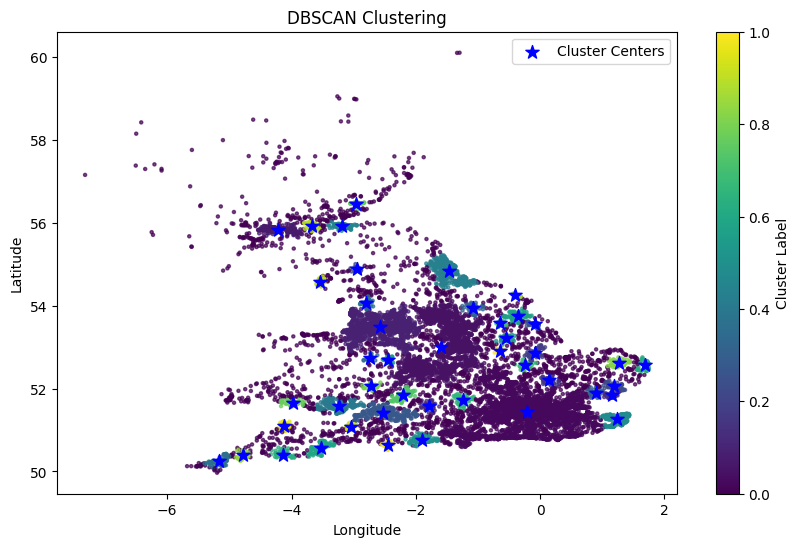

In [57]:
eps = .1
min_samples = 25
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(data)

# Get cluster centers
unique_labels = np.unique(cluster_labels)
cluster_centers = []
for label in unique_labels:
    if label != -1:
        cluster_centers.append(np.mean(data[cluster_labels == label], axis=0))

# Plotting the clusters and cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7,s=5)
cluster_centers = np.array(cluster_centers)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', color='blue', s=100, label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


In [99]:
accident["time"]

0        09:00
1        13:55
2        01:25
3        01:50
4        02:25
         ...  
91194    14:30
91195    15:05
91196    12:42
91197    14:00
91198    13:50
Name: time, Length: 91199, dtype: object

In [100]:
df=accident

In [101]:
df["converted_time"] = pd.DatetimeIndex(df["time"])

In [113]:
df['decimal_time'] = df["converted_time"].dt.hour+ df["converted_time"].dt.minute/60

In [114]:
df['decimal_time']

0         9.000000
1        13.916667
2         1.416667
3         1.833333
4         2.416667
           ...    
91194    14.500000
91195    15.083333
91196    12.700000
91197    14.000000
91198    13.833333
Name: decimal_time, Length: 91199, dtype: float64